In [1]:
import numpy as np
import pandas as pd
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread

In [2]:
ROOT_DIR = os.path.abspath("../")
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
BASE_IMG_PATH=DATASET_PATH

In [3]:
os.path.join(BASE_IMG_PATH,'TB-Dataset/cavern_report_train_CT_1','*')

'/media/user/hai/Task 2020-21/Task 21-22/TB/viptt-net-main/dataset/TB-Dataset/cavern_report_train_CT_1/*'

In [4]:
all_images=glob(os.path.join(BASE_IMG_PATH,'TB-Dataset/cavern_report_train_CT_1','TRN_*'))
all_masks=glob(os.path.join(BASE_IMG_PATH,'TB-Dataset/cavern_report_train_masks1','TRN_*'))
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

30  matching files found: /media/user/hai/Task 2020-21/Task 21-22/TB/viptt-net-main/dataset/TB-Dataset/cavern_report_train_CT_1/TRN_23.nii.gz /media/user/hai/Task 2020-21/Task 21-22/TB/viptt-net-main/dataset/TB-Dataset/cavern_report_train_masks1/TRN_21_mask.nii.gz


In [6]:
base=os.path.basename(all_images[0])
fname_ext = os.path.splitext(base)
fn_ext = os.path.splitext(fname_ext[0])
fn_ext[0]

'TRN_23'

/home/user/anaconda3/envs/tensorgpu4/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/home/user/anaconda3/envs/tensorgpu4/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/user/anaconda3/envs/tensorgpu4/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable re

Image Filename :  /media/user/hai/Task 2020-21/Task 21-22/TB/viptt-net-main/dataset/TB-Dataset/cavern_report_train_CT_1/TRN_23.nii.gz
Mask Filename :  /media/user/hai/Task 2020-21/Task 21-22/TB/viptt-net-main/dataset/TB-Dataset/cavern_report_train_masks1/TRN_23_mask.nii.gz


Text(0.5, 1.0, 'Mask')

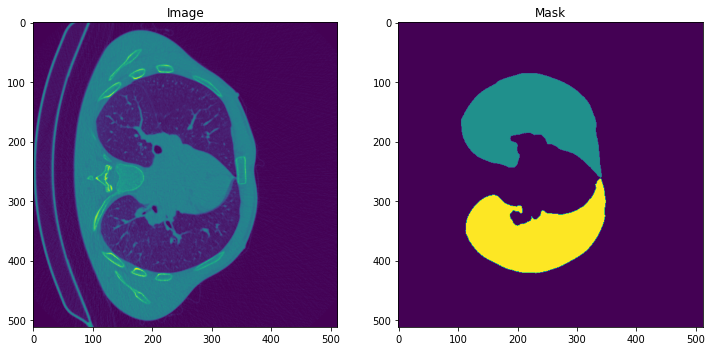

In [10]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()

#********************** Newly added *********************
base=os.path.basename(all_images[0])
fname_ext = os.path.splitext(base)
fn_ext_1 = os.path.splitext(fname_ext[0])
fn_ext_1[0]
fname = fn_ext_1[0]+'_mask.nii.gz'
all_masks_fname=glob(os.path.join(BASE_IMG_PATH,'TB-Dataset/cavern_report_train_masks1',fname))
#*********************************************************

test_mask=nib.load(all_masks_fname[0]).get_data()

print("Image Filename : ", all_images[0])
print("Mask Filename : ", all_masks_fname[0])

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
#ax1.imshow(test_image[test_image.shape[0]//2])
ax1.imshow(test_image[:,:,test_image.shape[2]//2])   #33
ax1.set_title('Image')
#ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.imshow(test_mask[:,:,test_mask.shape[2]//2])   #33
ax2.set_title('Mask')

In [11]:
test_image.shape

(512, 512, 421)

In [12]:
test_image.shape

(512, 512, 421)

In [13]:
test_image.shape[2]//2

210

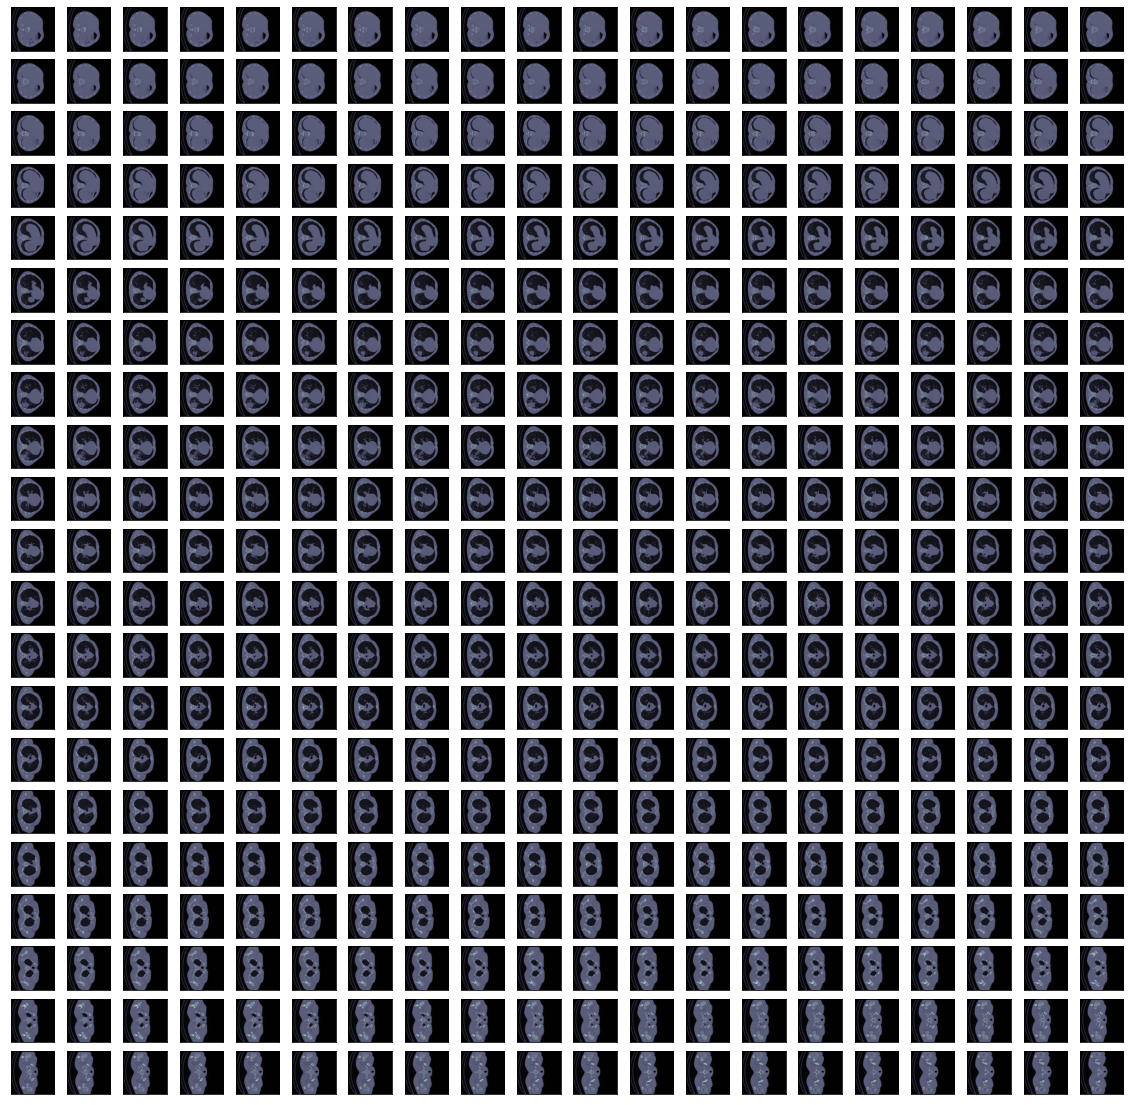

In [14]:
import matplotlib.pyplot as plt
def display(im3d, cmap="bone", step=1):
    _, axes = plt.subplots(nrows=21, ncols=20, figsize=(20, 20))

    vmin = im3d.min()
    vmax = im3d.max()
    i = 0
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(test_image[:,:,i], cmap=cmap, vmin=vmin, vmax=vmax)
        i = i + 1
        ax.set_xticks([])
        ax.set_yticks([])


display(test_image)

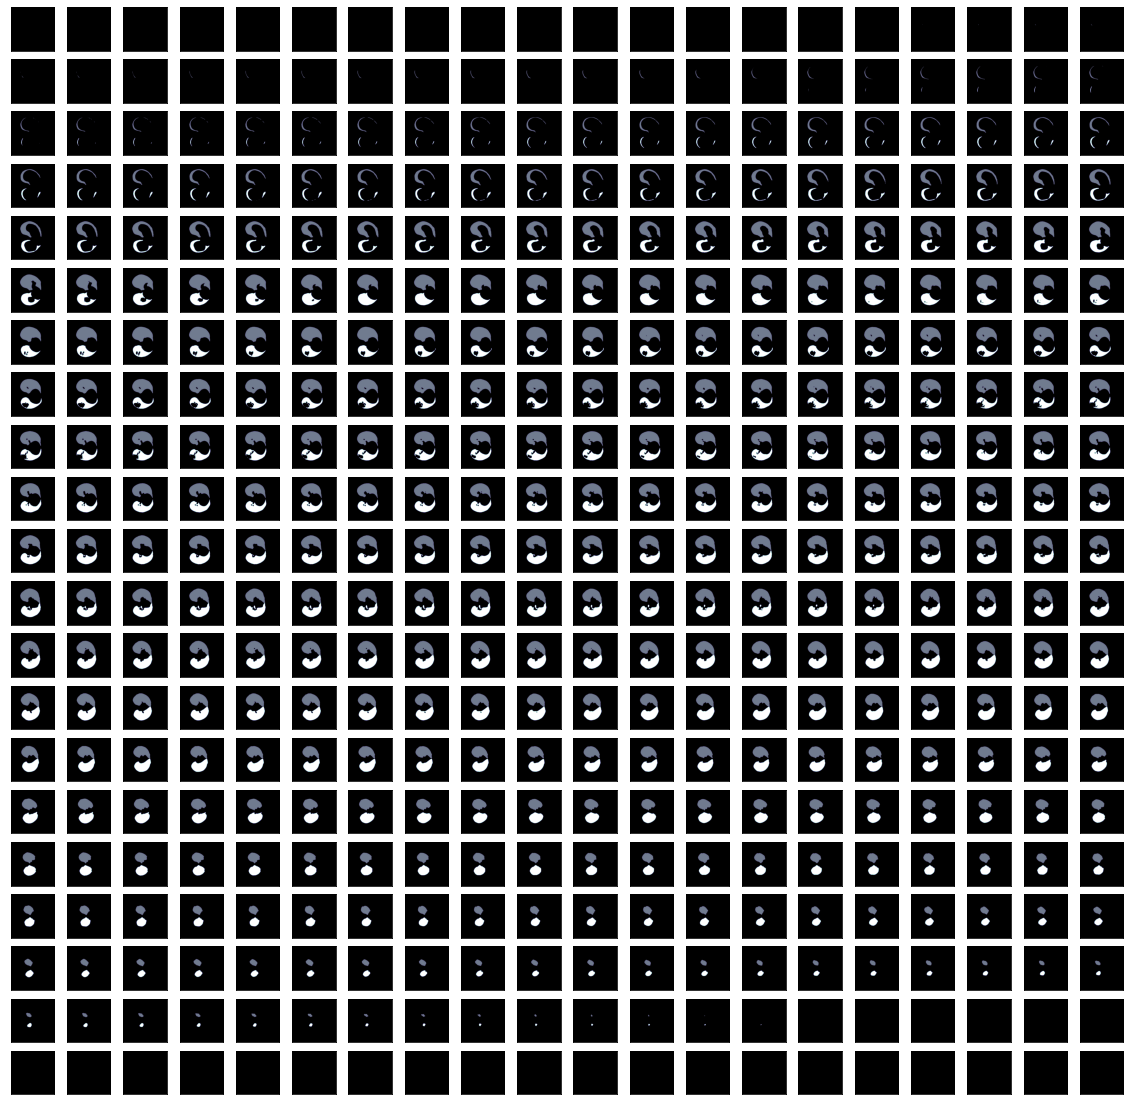

In [15]:
def display_2(im3d, cmap="bone", step=1):
    _, axes = plt.subplots(nrows=21, ncols=20, figsize=(20, 20))

    vmin = im3d.min()
    vmax = im3d.max()
    i = 0
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(test_mask[:,:,i], cmap=cmap, vmin=vmin, vmax=vmax)
        i = i + 1
        ax.set_xticks([])
        ax.set_yticks([])

display_2(test_mask)

Text(0.5, 1.0, 'Result')

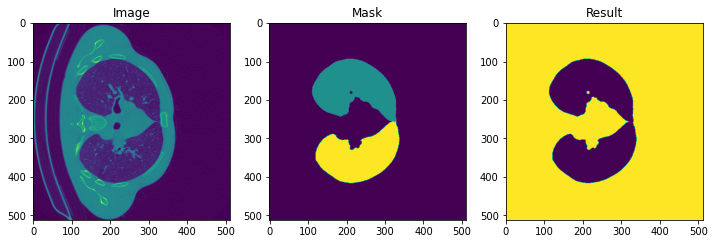

In [49]:
import cv2
import numpy as np

image = test_image[:,:,250]
mask = test_mask[:,:,250]

result = cv2.bitwise_and(image, mask)
result[mask==0] = 255

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 6))
ax1.imshow(image)
ax1.set_title('Image')
ax2.imshow(mask)
ax2.set_title('Mask')
ax3.imshow(result)
ax3.set_title('Result')

Text(0.5, 1.0, 'Bgground White')

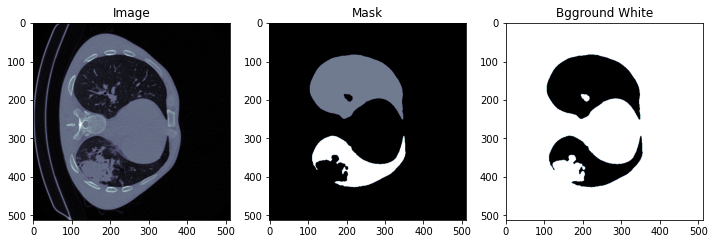

In [70]:
import cv2
import numpy as np

image = test_image[:,:,150]
mask = test_mask[:,:,150]

result = cv2.bitwise_and(image, mask)
result[mask==0] = 255

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 6))
ax1.imshow(image,cmap="bone")
ax1.set_title('Image')
ax2.imshow(mask,cmap="bone")
ax2.set_title('Mask')
ax3.imshow(result,cmap="bone")
ax3.set_title('Bgground White')

Text(0.5, 1.0, 'Binary Image-Inverse')

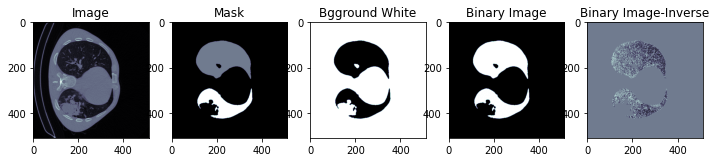

In [71]:
mask_inv =  255 - result;

final_im = mask_inv*image

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (12, 6))
ax1.imshow(image,cmap="bone")
ax1.set_title('Image')
ax2.imshow(mask,cmap="bone")
ax2.set_title('Mask')

ax3.imshow(result,cmap="bone")
ax3.set_title('Bgground White')

ax4.imshow(mask_inv,cmap="bone")
ax4.set_title('Binary Image')
ax5.imshow(final_im,cmap="bone")
ax5.set_title('Binary Image-Inverse')

In [65]:
import numpy as np
import cv2

values = np.array(mask_inv)
values.max()

255

Text(0.5, 1.0, 'Image')

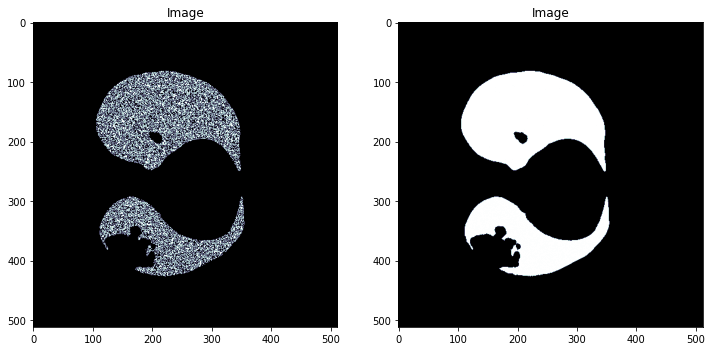

In [72]:
mask_inv_copy_1 = mask_inv
mask_inv_copy_2 = mask_inv

mask_inv_copy_2 = mask_inv_copy_2 / 255


for i, v1 in enumerate(mask_inv_copy_1):
    for j, v2 in enumerate(v1):
        if v2 == 255:
            mask_inv_copy_1[i, j] = 1

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(mask_inv_copy_1,cmap="bone")
ax1.set_title('Image')
ax2.imshow(mask_inv_copy_2,cmap="bone")
ax2.set_title('Image')

In [74]:
import numpy as np
import cv2

values = np.array(mask_inv_copy_2)
values.min()

0.0

Text(0.5, 1.0, 'Image')

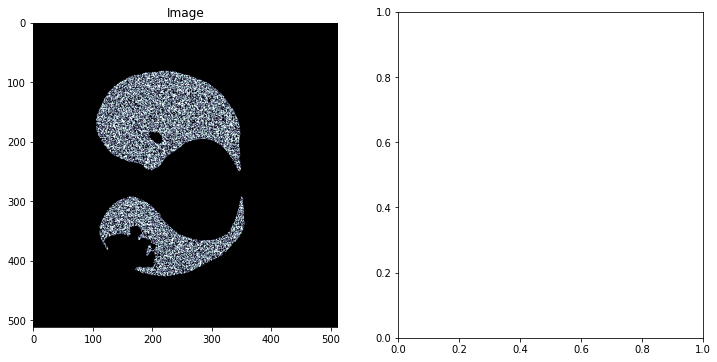

In [67]:
for i, v1 in enumerate(mask_inv):
    for j, v2 in enumerate(v1):
        if v2 == 255:
            mask_inv[i, j] = image[i, j]
            

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(mask_inv,cmap="bone")   #33
ax1.set_title('Image')

In [52]:
image


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)